In [1]:
import pandas as pd

from datetime import datetime
from pathlib import Path

In [2]:
# Read ian the stock price data
file_path = Path('historical_data', 'HistoricalData_COMP.csv')
stock_price_df = pd.read_csv(file_path, parse_dates=['Date'])
stock_price_df.sort_values(by='Date', inplace=True)

# Capture the date range
oldest_date = stock_price_df['Date'].min()
newest_date = stock_price_df['Date'].max()

# Check data frame
stock_price_df

,Date,Close/Last,Open,High,Low
2533,2014-01-06,4113.68,4137.03,4139.78,4103.75
2532,2014-01-07,4153.18,4128.57,4158.18,4126.48
2531,2014-01-08,4165.61,4154.28,4171.75,4145.00
2530,2014-01-09,4156.19,4179.04,4182.74,4142.70
2529,2014-01-10,4174.66,4168.94,4174.68,4142.21
...,...,...,...,...,...
4,2023-12-28,15095.14,15142.09,15150.07,15087.22
3,2023-12-29,15011.35,15099.20,15111.41,14955.37
2,2024-01-02,14765.94,14873.70,14887.80,14682.38
1,2024-01-03,14592.21,14641.47,14694.58,14577.44


In [3]:
# Calculate the percent change in the Close/Last price for each date.
# The price is not necessarily reported every day. For dates with more than 1 date between them, the price change is averaged.
stock_price_df['Days'] = (stock_price_df['Date'] - stock_price_df['Date'].shift()).dt.days
stock_price_df['Delta Close/Last'] = stock_price_df['Close/Last'] - stock_price_df['Close/Last'].shift()
stock_price_df['Daily Change Close/Last'] = stock_price_df['Delta Close/Last'] / stock_price_df['Days']
stock_price_df['% Change Close/Last'] = stock_price_df['Daily Change Close/Last'] / stock_price_df['Close/Last']
stock_price_df

,Date,Close/Last,Open,High,Low,Days,Delta Close/Last,Daily Change Close/Last,% Change Close/Last
2533,2014-01-06,4113.68,4137.03,4139.78,4103.75,NaN,NaN,NaN,NaN
2532,2014-01-07,4153.18,4128.57,4158.18,4126.48,1.0,39.50,39.5000,0.009511
2531,2014-01-08,4165.61,4154.28,4171.75,4145.00,1.0,12.43,12.4300,0.002984
2530,2014-01-09,4156.19,4179.04,4182.74,4142.70,1.0,-9.42,-9.4200,-0.002266
2529,2014-01-10,4174.66,4168.94,4174.68,4142.21,1.0,18.47,18.4700,0.004424
...,...,...,...,...,...,...,...,...,...
4,2023-12-28,15095.14,15142.09,15150.07,15087.22,1.0,-4.04,-4.0400,-0.000268
3,2023-12-29,15011.35,15099.20,15111.41,14955.37,1.0,-83.79,-83.7900,-0.005582
2,2024-01-02,14765.94,14873.70,14887.80,14682.38,4.0,-245.41,-61.3525,-0.004155
1,2024-01-03,14592.21,14641.47,14694.58,14577.44,1.0,-173.73,-173.7300,-0.011906


In [ ]:
# Export the data frame to a .csv file for further exploration.
df = stock_price_df.sort_values(by='% Change Close/Last')
df[['Date', 'Close/Last', 'Daily Change Close/Last', '% Change Close/Last']].to_csv('close_change.csv')

In [4]:
# Set up a data frame to highlight the percent changes in stock price we are interested in
change_range = 0.05
highlight_df = stock_price_df[(stock_price_df['% Change Close/Last'] < -change_range) | (stock_price_df['% Change Close/Last'] > change_range)]
highlight_df
# highlight_df.to_csv('highlights.csv')

,Date,Close/Last,Open,High,Low,Days,Delta Close/Last,Daily Change Close/Last,% Change Close/Last
960,2020-03-12,7201.80,7398.58,7712.33,7194.67,1.0,-750.25,-750.25,-0.104175
959,2020-03-13,7874.88,7610.39,7875.93,7219.09,1.0,673.08,673.08,0.085472
957,2020-03-17,7334.78,7072.00,7406.23,6828.91,1.0,430.19,430.19,0.058651
952,2020-03-24,7417.86,7196.15,7418.37,7169.86,1.0,557.19,557.19,0.075115
950,2020-03-26,7797.54,7462.21,7809.82,7462.21,1.0,413.24,413.24,0.052996
897,2020-06-11,9492.73,9791.24,9868.08,9491.30,1.0,-527.62,-527.62,-0.055581
838,2020-09-03,11458.10,11861.90,11894.40,11361.36,1.0,-598.34,-598.34,-0.052220
418,2022-05-05,12317.69,12787.52,12787.52,12183.56,1.0,-647.17,-647.17,-0.052540
329,2022-09-13,11633.57,11908.81,11957.97,11604.43,1.0,-632.84,-632.84,-0.054398
287,2022-11-10,11114.15,10869.17,11119.11,10779.95,1.0,760.98,760.98,0.068469


In [5]:
# Create a rolling average to better assess the trend of the stock price.
rolling_window = 90
rolling_average_df = stock_price_df
rolling_average_df['Rolling Avg. Close/Last'] = rolling_average_df['Close/Last'].rolling(rolling_window, center=True).mean()
# rolling_average_df.to_csv('rolling_average.csv')

C:\Users\Matthew\AppData\Local\Temp\ipykernel_8836\2505001869.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  highlight_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot(


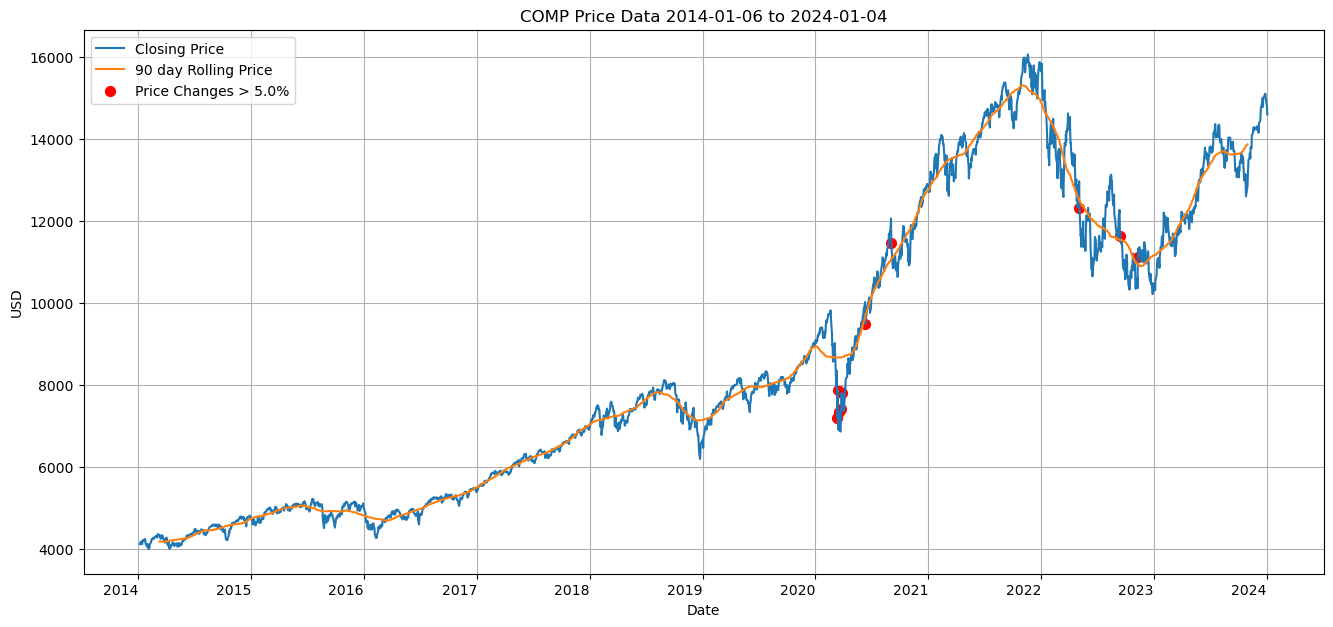

In [6]:
# Graph the stock price over time
figsize = (16, 8)
start = oldest_date
end = newest_date

# start = datetime(2016, 4, 1)
# end = datetime(2018, 7, 31)

# stock_price_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot('Date', 'Volume', ax=ax, secondary_y=True)
ax = stock_price_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot(
    'Date', 'Close/Last', figsize=figsize, title=f'COMP Price Data {start.date()} to {end.date()}')
rolling_average_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot('Date', 'Rolling Avg. Close/Last', ax=ax)
highlight_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot(
    'Date', 'Close/Last', kind='scatter', color='r', s=50, ax=ax, ylabel='USD', grid=True)
ax.legend(['Closing Price', f'{rolling_window} day Rolling Price', f'Price Changes > {change_range * 100}%'])